## Imports

In [1]:
import pandas as pd
import numpy as np

# Visialization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


## Functions

In [2]:
# def make_barplot(data, x, y, xlabel, ylabel, rotation=90):
#     plt.figure(figsize=(16, 6))
#     g = sns.barplot(x=x, y=y, data=data.sort_values(x), estimator=np.mean, ci=None)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.xticks(rotation=rotation)
#     return g

## Load data


In [3]:
prague_info = pd.read_csv('../data/flats_prague.csv')
brno_info = pd.read_csv('../data/flats_brno.csv')

### Prepare data

In [4]:
## Option 1
prague_info = prague_info.dropna()
brno_info = brno_info.dropna()
## Option 2
# prague_info = prague_info.fillna(prague_info.mean());
# brno_info = brno_info.fillna(brno_info.mean());

Remove outliners from the dataset.

In [5]:
f1 = prague_info['price'] < 100000
prague_info = prague_info[f1]
f2 = brno_info['price'] < 100000
brno_info = brno_info[f2]

In [6]:
prague_info = prague_info.sort_values('locality')
brno_info = brno_info.sort_values('locality')

In [7]:
prague_info.head()

,type,size,locality,price
1499,3+kt,80,Praha,20900.0
1641,4+kt,120,Praha,55000.0
3695,2+1,68,Praha,19900.0
1181,2+kt,60,Praha,15000.0
1647,1+kt,30,Praha,9800.0


In [8]:
brno_info.head()

,type,size,locality,price
530,1+kt,42,Brno,20580.0
260,3+kt,115,Brno,18500.0
267,1+kt,34,Brno,11000.0
279,2+kt,58,Brno,15000.0
292,1+kt,37,Brno,9500.0


## Prague data analysis

In [9]:
prague_info.head()

,type,size,locality,price
1499,3+kt,80,Praha,20900.0
1641,4+kt,120,Praha,55000.0
3695,2+1,68,Praha,19900.0
1181,2+kt,60,Praha,15000.0
1647,1+kt,30,Praha,9800.0


In [10]:
prague_info.describe(include='all')

,type,size,locality,price
count,4341,4341.000000,4341,4341.000000
unique,12,NaN,10,NaN
top,2+kt,NaN,Praha 1,NaN
freq,1269,NaN,871,NaN
mean,NaN,80.188897,NaN,28260.235430
std,NaN,44.453997,NaN,16731.431365
min,NaN,9.000000,NaN,4000.000000
25%,NaN,50.000000,NaN,16500.000000
50%,NaN,70.000000,NaN,22500.000000
75%,NaN,100.000000,NaN,35000.000000


In [11]:
prague_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4341 entries, 1499 to 1705
Data columns (total 4 columns):
type        4341 non-null object
size        4341 non-null int64
locality    4341 non-null object
price       4341 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 169.6+ KB


### District statistics

In [12]:
prague_info.groupby('locality').agg(['count', 'mean'])

size            price              
         count       mean count          mean
locality                                     
Praha      378  74.206349   378  23626.621693
Praha 1    871  90.769231   871  34361.285878
Praha 2    739  80.456022   739  32612.989175
Praha 3    356  80.744382   356  31977.207865
Praha 4    357  65.955182   357  19108.616246
Praha 5    611  73.869067   611  24607.045827
Praha 6    379  96.720317   379  30156.437995
Praha 7    186  98.263441   186  33904.376344
Praha 8    232  67.620690   232  21359.301724
Praha 9    232  58.129310   232  16317.719828

### Visualizations


#### Price dependence on the flat's size.
Obviously the bigger the flat is, the more expensive it is.

<Figure size 1152x432 with 0 Axes>

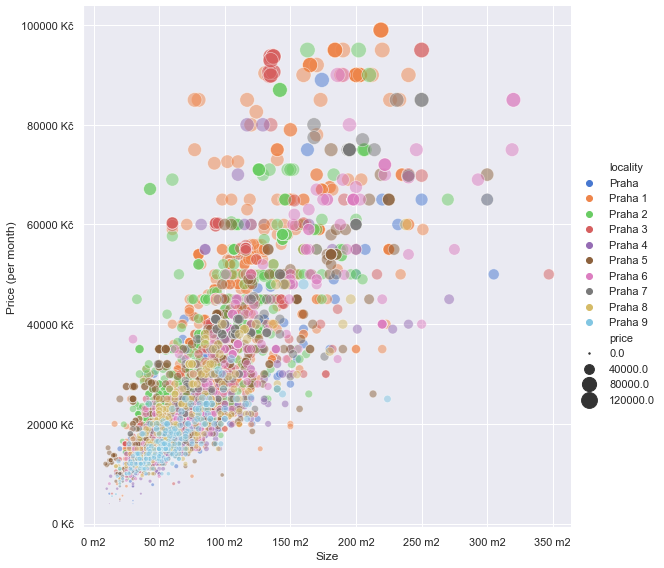

In [13]:
plt.figure(figsize=(16, 6))
g = sns.relplot(x='size', y='price', data=prague_info.sort_values('locality'), hue='locality', palette='muted',
                size='price', sizes=(2, 250), alpha=.5, height=8)
plt.ylabel('Price (per month)')
plt.xlabel('Size')
for ax in g.axes.flat:
    xlabels = ['{}'.format(int(x)) + ' m2' for x in ax.get_xticks()]
    ylabels = ['{}'.format(int(y)) + ' Kč' for y in ax.get_yticks()]
    ax.set_xticklabels(xlabels)
    ax.set_yticklabels(ylabels)

#### Price dependence on the flat's type.
The most *cheap* flat type is `flatshare`, whereas the most *expensive* one is `4+1`.

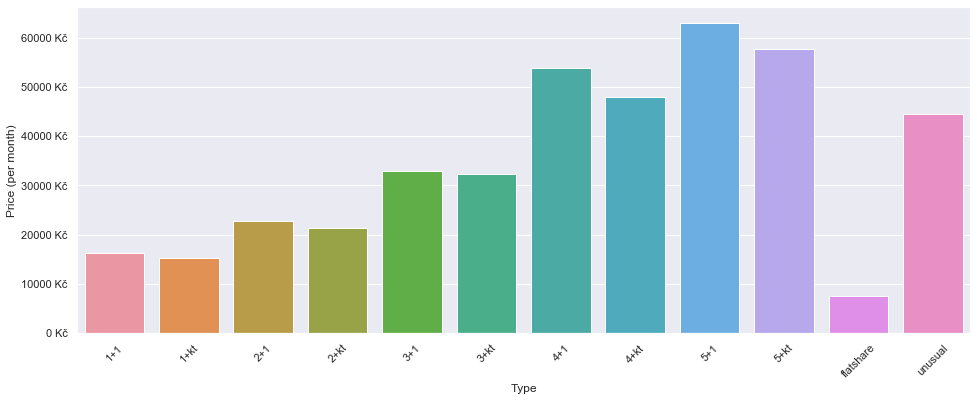

In [14]:
plt.figure(figsize=(16, 6))
g = sns.barplot(x='type', y='price', data=prague_info.sort_values('type'),
                estimator=np.mean, ci=None)
plt.xlabel('Type')
plt.ylabel('Price (per month)')
ylabels = ['{}'.format(int(x)) + ' Kč' for x in g.get_yticks()]
g.set_yticklabels(ylabels)
plt.xticks(rotation=45);

#### Price dependence on the flat's district.
Averagely flats in `Praha 1`, `Praha 2`, `Praha 3`, `Praha 6` and `Praha 7` are the most expensive.

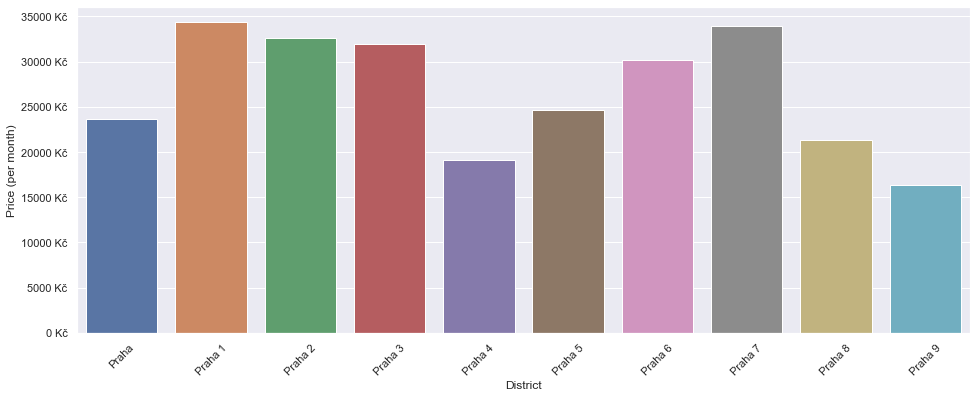

In [15]:
plt.figure(figsize=(16, 6))
g = sns.barplot(x='locality', y='price', data=prague_info.sort_values('locality'),
                estimator=np.mean, ci=None)
plt.xlabel('District')
plt.ylabel('Price (per month)')
ylabels = ['{}'.format(int(x)) + ' Kč' for x in g.get_yticks()]
g.set_yticklabels(ylabels)
plt.xticks(rotation=45);

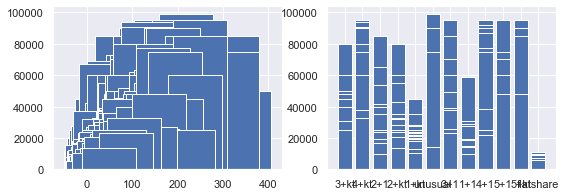

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(9,3))
axes[0].bar(prague_info['size'], prague_info['price'])
axes[1].bar(prague_info['type'], prague_info['price'])
plt.show()